#A Step-by-Step Guide to Calculate Distances and Trip Durations Between Lists of GPS Coordinates using OpenStreetMap

*Giuseppe PULINA - 13/08/2023*

This notebook provides a quick method for calculating the road distance and trip duration between two GPS points using [OpenStreetMap](https://www.openstreetmap.org/) API with Python. To accomplish this, we first make HTTP requests to their API and then parse the response.
In the following sections, we will use the `requests` library for making the HTTP request and the `json` library for parsing the JSON response.


##1. Install Required Libraries:
Make sure you have the `requests` library installed. You can install it using the following command:

In [ ]:
pip install requests

##2. Prepare/Import Lists of GPS Coordinates:
Create lists of GPS coordinates (latitude and longitude) for both origin and destination points. Each list should contain tuples of coordinates.

Example:

In [ ]:
# Coordinates in decimal degrees
origins = [
    (52.5200, 13.4050),  # Berlin
    (48.8566, 2.3522),   # Paris
    (49.61024, 6.12464), # BCL Monterey
    # Add more origins
]

destinations = [
    (51.5074, -0.1278),  # London
    (41.9028, 12.4964),  # Rome
    (49.60890, 6.13186), # Cantine de la fonction publique
    # Add more destinations
]

##3. Calculate Distances and Durations:

Use the following code to calculate *road* and *walking* distances, as well as trip durations, between each origin and destination pair.

In this code, the `get_osrm_route_info` function takes latitude and longitude coordinates for two points, makes an API request to the [OSRM API](http://project-osrm.org/docs/v5.22.0/api/?language=Python#general-options), and extracts the road distance and trip duration from the API response. The calculated distance is in kilometers and the duration in minutes.

Please note that the [OSRM API](http://project-osrm.org/docs/v5.22.0/api/?language=Python#general-options) endpoint used in the following code is a public demo server. If you plan to use it in a production environment or for heavy usage, it's recommended to set up your own OSRM server.

Also, keep in mind that the [OpenStreetMap API usage policy](https://operations.osmfoundation.org/policies/api/) may change, so make sure to review and comply with their terms of use before integrating this code into an application.

In [ ]:
# @title Run this code if you just want a list of distances and durations for a specific profile
import requests

def get_osrm_route_info(profile, lat1, lon1, lat2, lon2):
    osrm_endpoint = "http://router.project-osrm.org/route/v1/{}/{},{};{},{}?geometries=geojson&steps=true"
    response = requests.get(osrm_endpoint.format(profile, lon1, lat1, lon2, lat2))

    if response.status_code == 200: # The HTTP 200 OK success status response code indicates that the request has succeeded
        data = response.json()
        if "routes" in data and len(data["routes"]) > 0:
            route = data["routes"][0]
            distance = route["distance"] / 1000  # Convert meters to kilometers
            duration = route["duration"] / 60  # Convert seconds to minutes
            return distance, duration
        else:
            return None, None
    else:
        return None, None

#profiles = ["driving", "walking"]  # Feel free to modify profiles as required. However, there appears to be an issue with the walking profile, as it currently appears to match the driving profile exactly.
profiles = ["driving"]  # Change profiles as needed. However, there appears to be an issue with the walking profile, as it currently seems to match the driving profile exactly

for profile in profiles:

    distances_profile = [] # This initializes a vector of distances in kilometers associated with the current profile.
    durations_profile = [] # This initializes a vector of trip durations in minutes associated with the current profile.

    print(f"Calculating distances using profile: {profile}")
    for origin in origins:
        lat1, lon1 = origin
        for destination in destinations:
            lat2, lon2 = destination
            distance, duration = get_osrm_route_info(profile, lat1, lon1, lat2, lon2)

            if distance is not None and duration is not None:
                distances_profile.append(round(distance, 2))
                durations_profile.append(duration)
                print(f"{profile.capitalize()} distance from {origin} to {destination}: {distance:.2f} km")  # Comment out this print statement if your list of origins or destinations is too lengthy.
                print(f"Duration of the {profile} trip: {duration:.2f} minutes") # Comment out this print statement if your list of origins or destinations is too lengthy.
            else:
                print(f"Error fetching route information for {profile} from OpenStreetMap API")

Calculating distances using profile: driving
Driving distance from (52.52, 13.405) to (51.5074, -0.1278): 1101.52 km
Duration of the driving trip: 713.14 minutes
Driving distance from (52.52, 13.405) to (41.9028, 12.4964): 1502.65 km
Duration of the driving trip: 920.47 minutes
Driving distance from (52.52, 13.405) to (49.6089, 6.13186): 763.42 km
Duration of the driving trip: 474.86 minutes
Driving distance from (48.8566, 2.3522) to (51.5074, -0.1278): 617.38 km
Duration of the driving trip: 656.64 minutes
Driving distance from (48.8566, 2.3522) to (41.9028, 12.4964): 1432.84 km
Duration of the driving trip: 907.32 minutes
Driving distance from (48.8566, 2.3522) to (49.6089, 6.13186): 358.01 km
Duration of the driving trip: 236.52 minutes
Driving distance from (49.61024, 6.12464) to (51.5074, -0.1278): 582.59 km
Duration of the driving trip: 409.50 minutes
Driving distance from (49.61024, 6.12464) to (41.9028, 12.4964): 1263.24 km
Duration of the driving trip: 818.49 minutes
Driving d

##4. Customization:

Customize the origins and destinations lists with your desired coordinates.
You can adjust the profiles to calculate distances for various modes of travel (e.g., "driving-car", "cycling-regular", "walking" etc.).
However, I've observed that the "walking" profile does not appear to yield a distance/duration distinct from the "driving" profile. Therefore,
please feel free to further modify the code to accommodate specific use cases or requirements, but always make sure to verify the consistency of the results.


##5. Review API Usage Policy:
As always, review and comply with the [OpenStreetMap API usage policy](https://operations.osmfoundation.org/policies/api/) and consider setting up your own OSRM server for heavier usage.

By following these steps, you can calculate distances and trip duration between multiple lists of GPS coordinates using the [OpenStreetMap](https://www.openstreetmap.org/) API for driving and other scenarios.

##6. Additional material

###6.1 Plotting Trip Distances and Durations

We can enhance the program by adding code to visualize the trip distances and durations using the `matplotlib` library. Ensure that you have `matplotlib` installed by executing the following command:

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

The following code includes a section for plotting, so if you need such visualizations, you should run this version instead of the one in Section 3.

This code creates scatter plots showing the relationship between trip distances and durations for each origin-destination pair using the matplotlib library. The code generates separate plots for each chosen travel profile (e.g., "driving" and "walking").

Calculating distances using profile: driving
Driving distance from (52.52, 13.405) to (51.5074, -0.1278): 1101.52 km
Duration of the driving trip: 713.14 minutes
Driving distance from (52.52, 13.405) to (41.9028, 12.4964): 1502.65 km
Duration of the driving trip: 920.47 minutes
Driving distance from (52.52, 13.405) to (49.6088, 6.1318): 763.41 km
Duration of the driving trip: 474.87 minutes
Driving distance from (48.8566, 2.3522) to (51.5074, -0.1278): 617.38 km
Duration of the driving trip: 656.64 minutes
Driving distance from (48.8566, 2.3522) to (41.9028, 12.4964): 1432.84 km
Duration of the driving trip: 907.32 minutes
Driving distance from (48.8566, 2.3522) to (49.6088, 6.1318): 358.00 km
Duration of the driving trip: 236.52 minutes
Driving distance from (49.6101, 6.1246) to (51.5074, -0.1278): 582.51 km
Duration of the driving trip: 409.15 minutes
Driving distance from (49.6101, 6.1246) to (41.9028, 12.4964): 1263.93 km
Duration of the driving trip: 819.74 minutes
Driving distanc

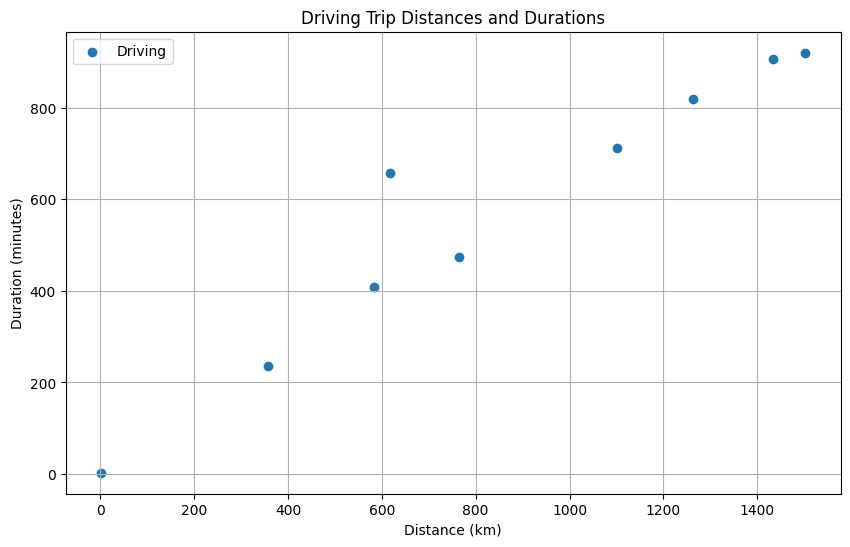

In [ ]:
# @title Run this code if you want to add scatter plots
import requests

def get_osrm_route_info(profile, lat1, lon1, lat2, lon2):
    osrm_endpoint = "http://router.project-osrm.org/route/v1/{}/{},{};{},{}?geometries=geojson&steps=true"
    response = requests.get(osrm_endpoint.format(profile, lon1, lat1, lon2, lat2))

    if response.status_code == 200: # The HTTP 200 OK success status response code indicates that the request has succeeded
        data = response.json()
        if "routes" in data and len(data["routes"]) > 0:
            route = data["routes"][0]
            distance = route["distance"] / 1000  # Convert meters to kilometers
            duration = route["duration"] / 60  # Convert seconds to minutes
            return distance, duration
        else:
            return None, None
    else:
        return None, None

#profiles = ["driving", "walking"]  # Feel free to modify profiles as required. However, there appears to be an issue with profiles other than driving, as any other profile currently appears to match the driving profile exactly.
profiles = ["driving"]  # Let's stick to the driving profile for now.

for profile in profiles:

    distances_profile = [] # This initializes a vector of distances in kilometers associated with the current profile.
    durations_profile = [] # This initializes a vector of trip durations in minutes associated with the current profile.

    print(f"Calculating distances using profile: {profile}")
    for origin in origins:
        lat1, lon1 = origin
        for destination in destinations:
            lat2, lon2 = destination
            distance, duration = get_osrm_route_info(profile, lat1, lon1, lat2, lon2)

            if distance is not None and duration is not None:
                distances_profile.append(distance)
                durations_profile.append(duration)
                print(f"{profile.capitalize()} distance from {origin} to {destination}: {distance:.2f} km")  # Comment this print out if your origin/destination list is too long.
                print(f"Duration of the {profile} trip: {duration:.2f} minutes") # Comment this print out if your origin/destination list is too long.
            else:
                print(f"Error fetching route information for {profile} from OpenStreetMap API")

    plt.figure(figsize=(10, 6))
    plt.scatter(distances_profile, durations_profile, label=profile.capitalize(), marker='o')
    plt.xlabel('Distance (km)')
    plt.ylabel('Duration (minutes)')
    plt.title(f'{profile.capitalize()} Trip Distances and Durations')
    plt.legend()
    plt.grid(True)
    plt.show()

###6.2 Great-circle Distance
To calculate the great-circle distance in kilometers between two GPS points, we can employ the [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula):


>
$$
  d = 2 \ r \ arcsin\left(\sqrt{h}\right) \equiv 2 \ r \ arctan\left(\frac{\sqrt h}{\sqrt{1 - h}}\right)
$$
 where
>
 >$r$ is the sphere radius, and
>
 >$h = sin^2\left(\frac{\text{difference in latitude}}{2}\right) + cos(\text{latitude_1}) \ cos(\text{latitude_2}) \ sin^2\left(\frac{\text{difference in longitude}}{2}\right) $.

This formula computes the distance between two points on the surface of a sphere, such as the Earth, based on their latitude and longitude coordinates.

In [ ]:

import math as m

def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371  # Earth's radius in kilometers. Remember, this is an approximation. The equatorial radius of the Earth is about 6378 km, while its polar radius is around 6357 km. This shows the Earth's slight flattening at the poles."

    #convert coordinates in radians to then use trig functions
    lat1_rad = m.radians(lat1)
    lon1_rad = m.radians(lon1)
    lat2_rad = m.radians(lat2)
    lon2_rad = m.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    h = m.sin(dlat / 2) ** 2 + m.cos(lat1_rad) * m.cos(lat2_rad) * m.sin(dlon / 2) ** 2
    #ars_h = m.asin(m.sqrt(h))   # result is always between -pi and pi.
    art_h =  m.atan2(m.sqrt(h), m.sqrt(1 - h))   # some  express arcsine with arctangent, I did not test if this has any advantages: arcsin(x) = arctan(x/(1-x^2)). result is always between -pi and pi

    distance = 2 * r * art_h
    return distance

distances_haversine = [] # This initializes a vector of great-circle distances in kilometers

print(f"Haversine distance between the all pairs")
for origin in origins:
    for destination in destinations:
        lat1, lon1 = origin
        lat2, lon2 = destination

        distance = haversine_distance(lat1, lon1, lat2, lon2)

        if distance is not None:
           distances_haversine.append(round(distance,2))
           print(f"Haversine distance from {origin} to {destination}: {distance:.2f} km")
        else:
           print(f"Error calculating the Haversine")


Haversine distance between the all pairs
Haversine distance from (52.52, 13.405) to (51.5074, -0.1278): 931.57 km
Haversine distance from (52.52, 13.405) to (41.9028, 12.4964): 1182.55 km
Haversine distance from (52.52, 13.405) to (49.6089, 6.13186): 602.14 km
Haversine distance from (48.8566, 2.3522) to (51.5074, -0.1278): 343.56 km
Haversine distance from (48.8566, 2.3522) to (41.9028, 12.4964): 1105.28 km
Haversine distance from (48.8566, 2.3522) to (49.6089, 6.13186): 286.87 km
Haversine distance from (49.61024, 6.12464) to (51.5074, -0.1278): 489.25 km
Haversine distance from (49.61024, 6.12464) to (41.9028, 12.4964): 988.53 km
Haversine distance from (49.61024, 6.12464) to (49.6089, 6.13186): 0.54 km


We can compare the Haversine distance with the measure from the profile computed above,

In [ ]:
pip install numpy

In [ ]:
import numpy as np
first_list = np.array(distances_profile)
second_list = np.array(distances_haversine)

distance_difference = first_list - second_list
#distance_difference[:, None]
formatted_distance_difference = [ '%.2f' % elem for elem in distance_difference ]

print(f"Difference in km between {profile.capitalize()} and Haversine distances: {list(formatted_distance_difference)}")

Difference in km between Driving and Haversine distances: ['169.95', '320.10', '161.26', '273.82', '327.56', '71.14', '93.25', '275.41', '0.82']


Let's compare the two measures in a plot, keeping the trip duration as calculated with the selected profile.

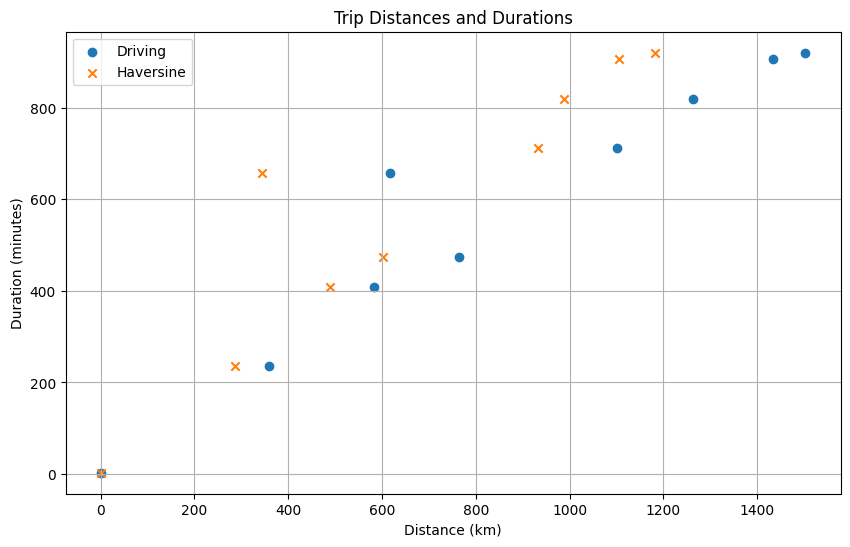

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(distances_profile, durations_profile, label=profile.capitalize(), marker='o')
plt.scatter(distances_haversine, durations_profile, label='Haversine', marker='x')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (minutes)')
plt.title('Trip Distances and Durations')
plt.legend()
plt.grid(True)
plt.show()


As expected, the Haversine distance is smaller.

###6.3 Calculating and Storing the Closest Destination with Associated Distance and Trip Duration

To extend the code to compute and store the closest destination for each origin, based on the profile's distance and trip duration, a typical approach is to save this distance and compare it to the one currently being calculated in the main loop.  

> One can implement this method to reduce the usage of the OpenStreetMap API. First, for each origin, find the closest destination with respect to the haversine distance, and then use this set as destination list to make the API calls.
